<a href="https://colab.research.google.com/github/joaoSouza2121/grafos/blob/main/8_comunidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="orange">Estudo da Teoria dos Grafos</font>

#Comunidades e Cliques

In [1]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev libcairo2-dev
!pip install cairocffi python-igraph

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python-dev is already the newest version (2.7.15~rc1-1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libxml2 is already the newest version (2.9.4+dfsg1-6.1ubuntu1.3).
libxml2 set to manually installed.
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.3).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 930 kB of archives.

In [2]:
# Importação das bibliotecas
from igraph import Graph
from igraph import plot
import igraph
import numpy as np

In [3]:
# Carregamento de grafo no formato graphml
grafo = igraph.load('Grafo.graphml')
print(grafo)

IGRAPH D-W- 53 179 --
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v),
  Sweetsgiver (v), b (v), g (v), id (v), label (v), r (v), size (v), x (v), y
  (v), Edge Label (e), id (e), weight (e)
+ edges:
 0 ->  3  4 36                              29 ->  0 13 45 49
 1 -> 14 24 50                              30 -> 13 14 23 29 40
 2 ->  1  3  8 15 35                        31 -> 35
 3 ->  9 13 22 35 45 48                     32 -> 21 26
 4 ->  0  5 13 23                           33 ->
 5 ->  1  3  4 13                           34 ->  4
 6 -> 10 15                                 35 ->  6 10 22 23 28 31 44 46 49
 7 ->                                       36 -> 10 49
 8 -> 40 49                                 37 ->  0  2 10 14 16 17 22 24 35
38 40 48
 9 ->  3                                    38 -> 22 32 36
10 ->  6  8 13 14 27                        39 ->
11 -> 43                                    40 ->  8 12 20 23 50
12 -> 40                                

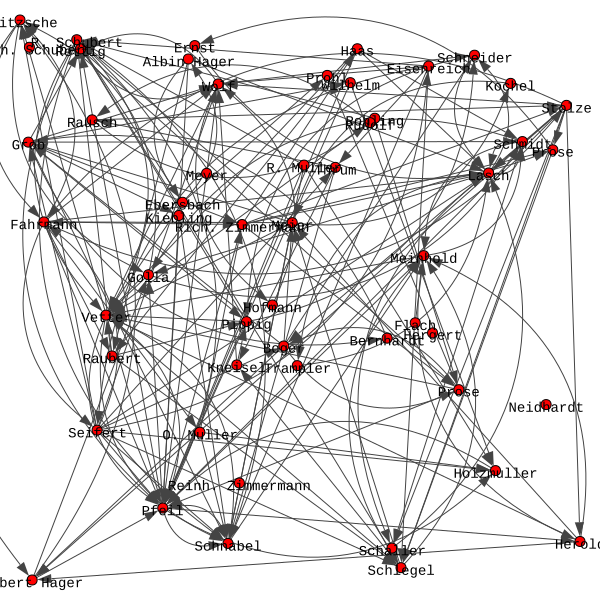

In [4]:
# Visualização do grafo
plot(grafo, bbox = (0,0,600,600))

In [5]:
# Visualização das comunidades
comunidades = grafo.clusters()
print(comunidades)

Clustering with 53 elements and 11 clusters
[ 0] 51, 52
[ 1] 47
[ 2] 42
[ 3] 39
[ 4] 34
[ 5] 33
[ 6] 25
[ 7] 19
[ 8] 7
[ 9] 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22,
     23, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 40, 41, 43, 44, 45,
     46, 48, 49, 50
[10] 18


In [6]:
# Visualização em qual comunidade qual registro foi associado
comunidades.membership

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 7,
 9,
 9,
 9,
 9,
 9,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 5,
 4,
 9,
 9,
 9,
 9,
 3,
 9,
 9,
 2,
 9,
 9,
 9,
 9,
 1,
 9,
 9,
 9,
 0,
 0]

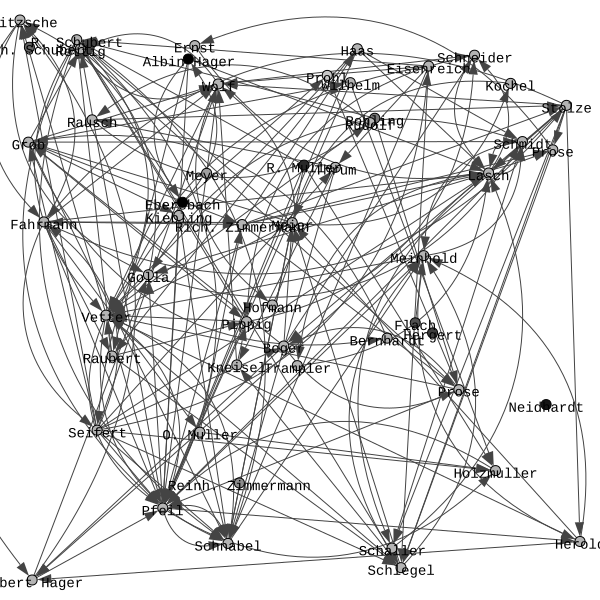

In [7]:
# Visualização do grafo
cores = comunidades.membership
# Array de cores para defirmos cores diferentes para cada grupo
cores = np.array(cores)
cores = cores * 20
cores = cores.tolist()
plot(grafo, vertex_color = cores)

exemplo 2

In [8]:
# Criação de grafo direcionado com pesos nas arestas
grafo2 = Graph(edges = [(0,2),(0,1),(1,4),(1,5),(2,3),(6,7),(3,7),(4,7),(5,6)],
                       directed = True)
grafo2.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo2.es['weight'] = [2,1,2,1,2,1,3,1]

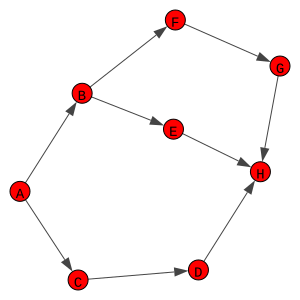

In [9]:
# Visualização do grafo
plot(grafo2, bbox = (0,0,300,300))

In [10]:
# Visualização de comunidades e em qual comunidade cada registro foi associado
comunidades2 = grafo2.clusters()
print(comunidades2)
comunidades2.membership

Clustering with 8 elements and 8 clusters
[0] 0
[1] 2
[2] 3
[3] 1
[4] 5
[5] 6
[6] 4
[7] 7


[0, 3, 1, 2, 6, 4, 5, 7]

In [11]:
# Função mais otimizada para visualização das comunidades
c = grafo2.community_edge_betweenness()
print(c)
# Obtenção do número de clusters
c.optimal_count
# Visualização da nova comunidade
comunidades3 = c.as_clustering()
print(comunidades3)
comunidades3.membership

Dendrogram, 8 elements, 7 merges

7 4 3 6 5 1 2 0
| | | | | | | |
`-' | | | | | |
 |  | | | | | |
 `--' | | | | |
  |   | | | | |
  `---' `-' `-'
    |    |   | 
    `----'   | 
      |      | 
      `------'
Clustering with 8 elements and 3 clusters
[0] 0, 2
[1] 1, 5
[2] 3, 4, 6, 7


[0, 1, 0, 2, 2, 1, 2, 2]

In [12]:
# Geração do grafo das comunidades colocando cores entre os grupos identificados
plot(grafo2, vertex_color = comunidades3.membership)
cores = comunidades3.membership
# Array de cores para defirmos cores diferentes para cada grupo
cores = np.array(cores)
cores = cores * 100
cores = cores.tolist()

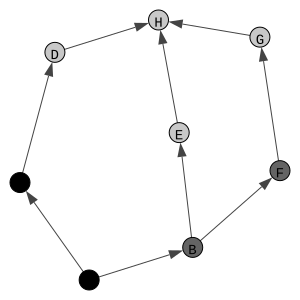

In [13]:
plot(grafo2, bbox = (0,0,300,300), vertex_color = cores)

In [14]:
# Visualização dos cliques
cli = grafo.as_undirected().cliques(min = 4)
print(cli)
len(cli)

[(0, 3, 13, 45), (13, 14, 45, 49), (21, 40, 44, 48), (14, 21, 44, 48), (13, 29, 45, 49), (0, 13, 29, 45), (1, 14, 24, 50), (14, 24, 37, 48), (17, 22, 37, 38), (3, 13, 22, 45), (4, 13, 14, 22), (14, 22, 42, 45), (13, 14, 22, 45), (10, 14, 37, 48), (10, 14, 21, 48), (4, 5, 13, 14), (1, 5, 14, 21)]


17